# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

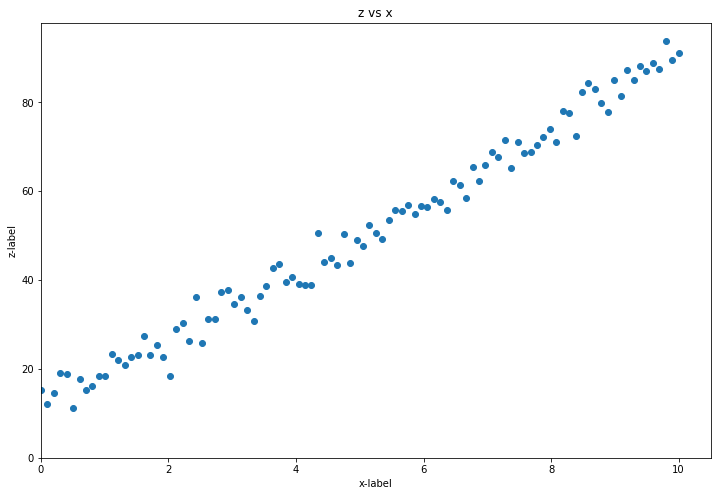

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=x, y=z)
ax.set_xlim(0, )
ax.set_ylim(0, )
plt.title("z vs x")
plt.xlabel("x-label")
plt.ylabel("z-label")
plt.show()

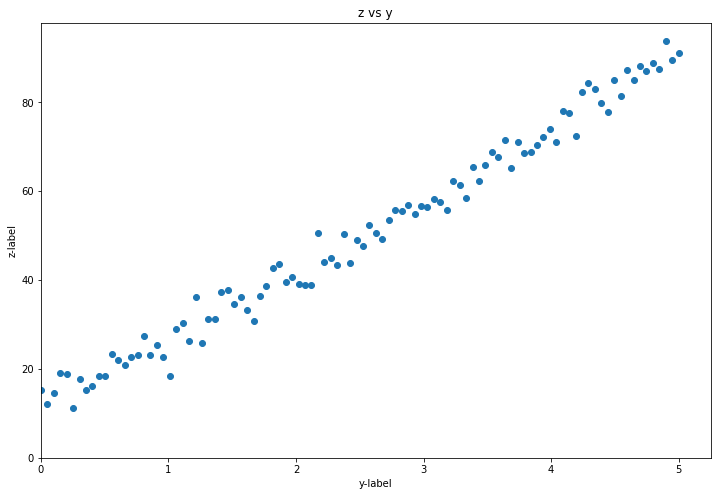

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=y, y=z)
ax.set_xlim(0, )
ax.set_ylim(0, )
plt.title("z vs y")
plt.xlabel("y-label")
plt.ylabel("z-label")
plt.show()

Yes, in both cases we can observe a linear relationship between the independent and dependent variables. z has a linear relationship with x and z has a linear relationship with y as well.

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [7]:
from scipy.stats import pearsonr

corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


Yes, as indicated by the pearson correlation, the independent variables x and y are highly correlated. 
If the linear regression model is applied to correlated features, then multicollinearity can introduce numerical unstability in the model, which weakens it's statistical power. 

**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [8]:
auto_mpg_df = pd.read_csv('Auto_mpg_data.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [9]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [10]:
### Your code here
auto_mpg_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [11]:
# percent of missing rows
missing_rows_percent = (1- (auto_mpg_df.dropna().shape[0])/
                        auto_mpg_df.shape[0])*100
missing_rows_percent

2.7189960629921295

**Answer:** We can see that the data has 4 columns, mileage, engine, max_power and seats with missing values.
We can either replace the empty values with mean/median/mode using simpleimputer from sklearn.impute, or drop the rows with missing values.

Upon analysis, I observed that about 2.7% of the total rows in the auto_mpg_df dataframe have null values. Also, many of these rows have multiple missing values. So I have dropped the rows that had null values as these rows had a lot of missing data.

In [12]:
auto_mpg_df.dropna(inplace=True)
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 803.1+ KB


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [13]:
### Your code here

# Remove unnecessary whitespace if any
auto_mpg_df["engine"] = auto_mpg_df["engine"].apply(
    lambda x: str(x).strip())
auto_mpg_df["mileage"] = auto_mpg_df["mileage"].apply(
    lambda x: str(x).strip())
auto_mpg_df["max_power"] = auto_mpg_df["max_power"].apply(
    lambda x: str(x).strip())

In [14]:
# For mileage column, calculating count of different units
kmkg_count = 0
kmpl_count = 0
for i in auto_mpg_df["mileage"]:
    if str(i).endswith("km/kg"):
        kmkg_count+=1
    elif str(i).endswith("kmpl"):
        kmpl_count+=1
print("Rows with km/kg : {} ".format(kmkg_count))
print("Rows with kmpl : {} ".format(kmpl_count))

Rows with km/kg : 88 
Rows with kmpl : 7819 


In [15]:
# Convert to all values to the same unit, and remove unit from
# mileage column
upd_mileage= []
for i in auto_mpg_df["mileage"]:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        upd_mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        upd_mileage.append(float(i))

auto_mpg_df["mileage"] = upd_mileage

In [16]:
# Remove units from engine and max_power column
auto_mpg_df["engine"] = auto_mpg_df["engine"].apply(
    lambda x: str(x).split(' ')[0])
auto_mpg_df["max_power"] = auto_mpg_df["max_power"].apply(
    lambda x: str(x).split(' ')[0])

In [17]:
# Max power has instances where only units are present
#auto_mpg_df["max_power"].unique()

# Removing instances where just the unit is given
auto_mpg_df = auto_mpg_df[auto_mpg_df.engine != 'CC']
auto_mpg_df = auto_mpg_df[auto_mpg_df.mileage != 'kmpl']
auto_mpg_df = auto_mpg_df[auto_mpg_df.max_power != 'bhp']

In [18]:
# Convert datatype to float
auto_mpg_df["engine"] = auto_mpg_df["engine"].astype('float')
auto_mpg_df["mileage"] = auto_mpg_df["mileage"].astype('float')
auto_mpg_df["max_power"] = auto_mpg_df["max_power"].astype('float')

auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [19]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

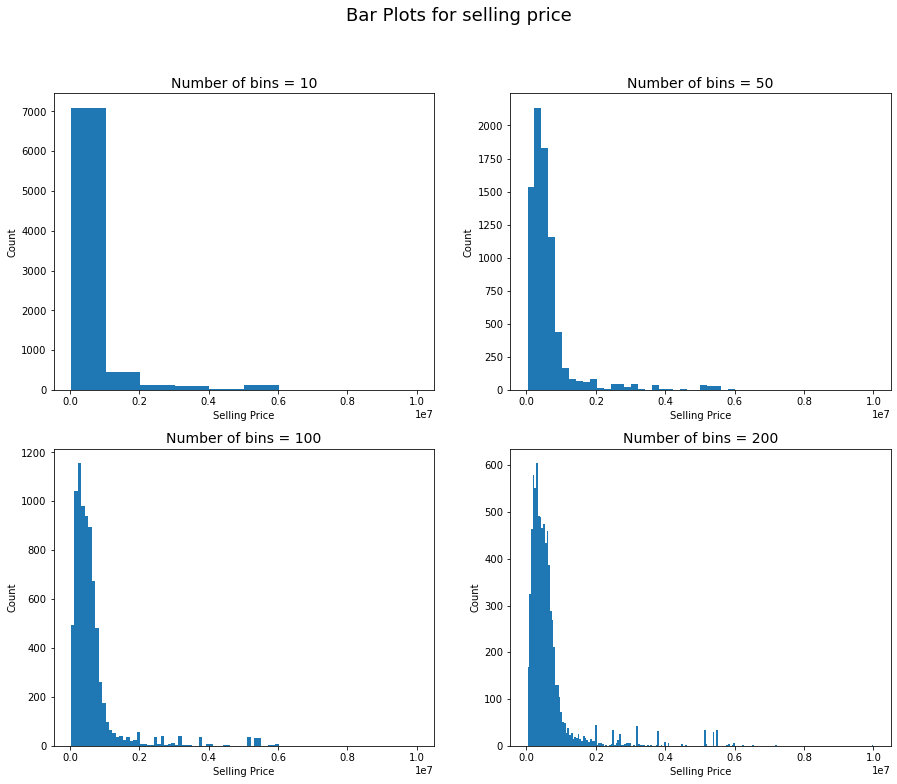

In [20]:
### Your code here

plt.figure(figsize=(15, 12))
bin_cnt = [10, 50, 100, 200]
plt.suptitle("Bar Plots for selling price", fontsize=18)
for i, bw in enumerate(bin_cnt):
    plt.subplot(2, 2, i+1)
    plt.title(("Number of bins = {}".format(bw)), fontsize=14)
    plt.hist(auto_mpg_y, bins=bw)
    plt.xlabel('Selling Price')
    plt.ylabel('Count')

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

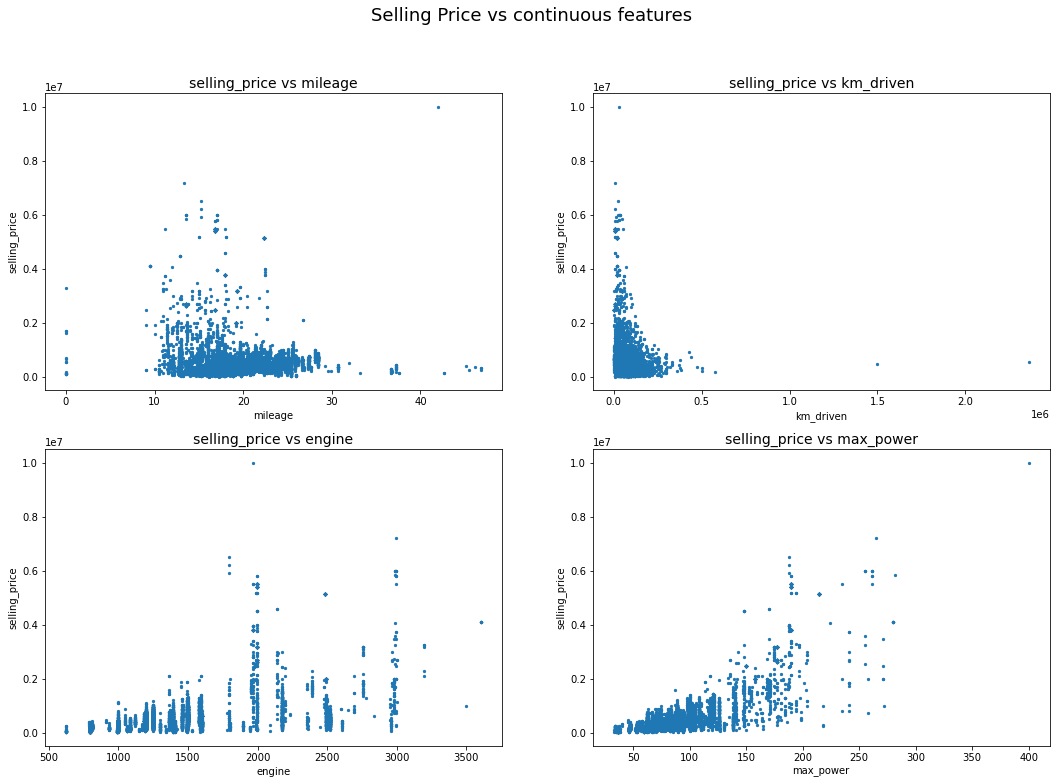

In [21]:
### Your code here
continuous_features = ['mileage', 'km_driven', 'engine', 'max_power']

plt.figure(figsize=(18, 12))
plt.suptitle("Selling Price vs continuous features", fontsize=18)
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i+1)
    plt.title(("selling_price vs {}".format(col)), fontsize=14)
    plt.scatter(auto_mpg_X[col], auto_mpg_y, s=5)
    plt.xlabel(col)
    plt.ylabel('selling_price')

**Answer:** We can observe that there is some sort of linear relationship between the selling price and the given continuous features, and there are outliers in the data. For instance, selling price mostly seems to be increasing with increase in max_power.

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

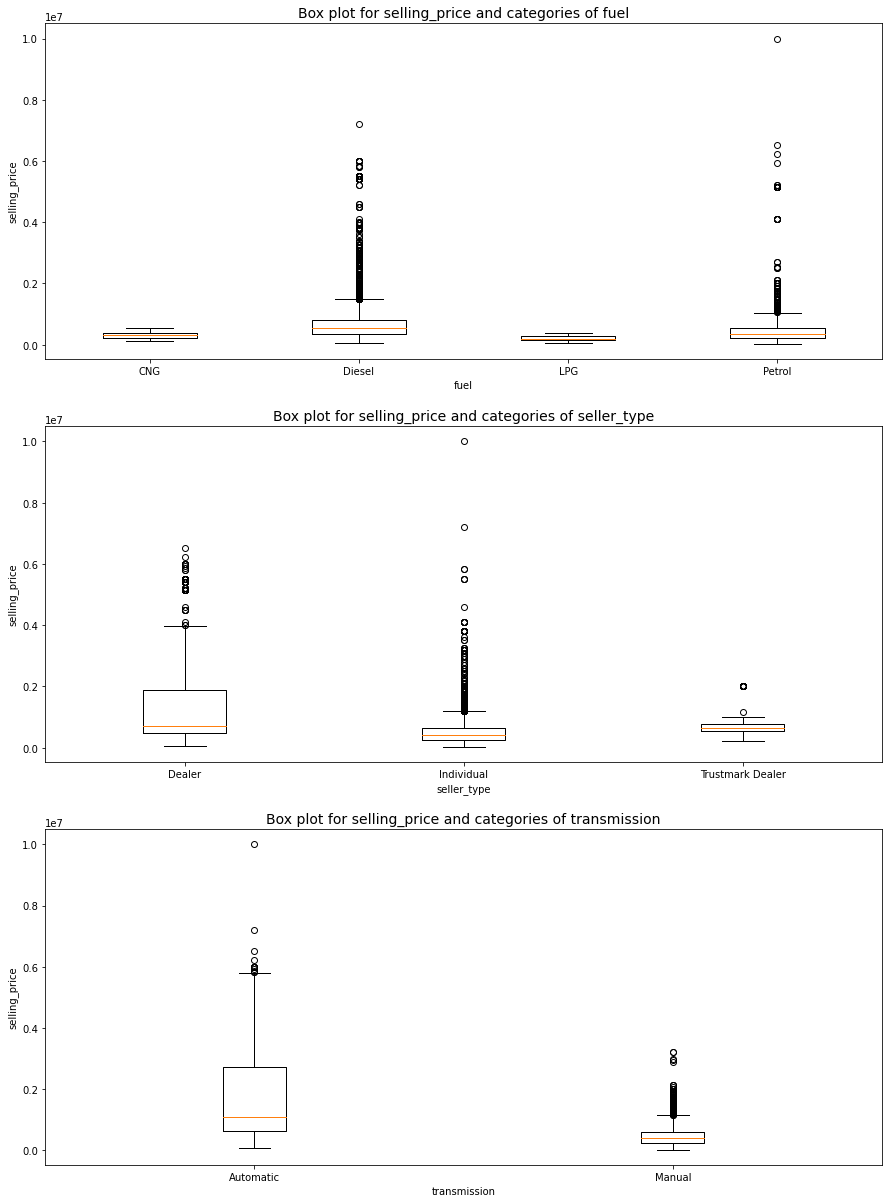

In [22]:
### Your code here
plt.figure(figsize=(15, 21))
discrete_features = ['fuel', 'seller_type', 'transmission']
for i, col in enumerate(discrete_features):
    plt.subplot(3, 1, i+1)
    plt.title(("Box plot for selling_price and categories of {}".format(col)), fontsize=14)
    items_in_col = {}
    for item in sorted(auto_mpg_df[col].unique()):
        item_val = auto_mpg_df.loc[auto_mpg_df[col] == item, 'selling_price'].values
        items_in_col.update({item: item_val})
    plt.boxplot(items_in_col.values())
    plt.xticks(range(1,len(items_in_col)+1), items_in_col.keys());
    plt.xlabel(col)
    plt.ylabel('selling_price')

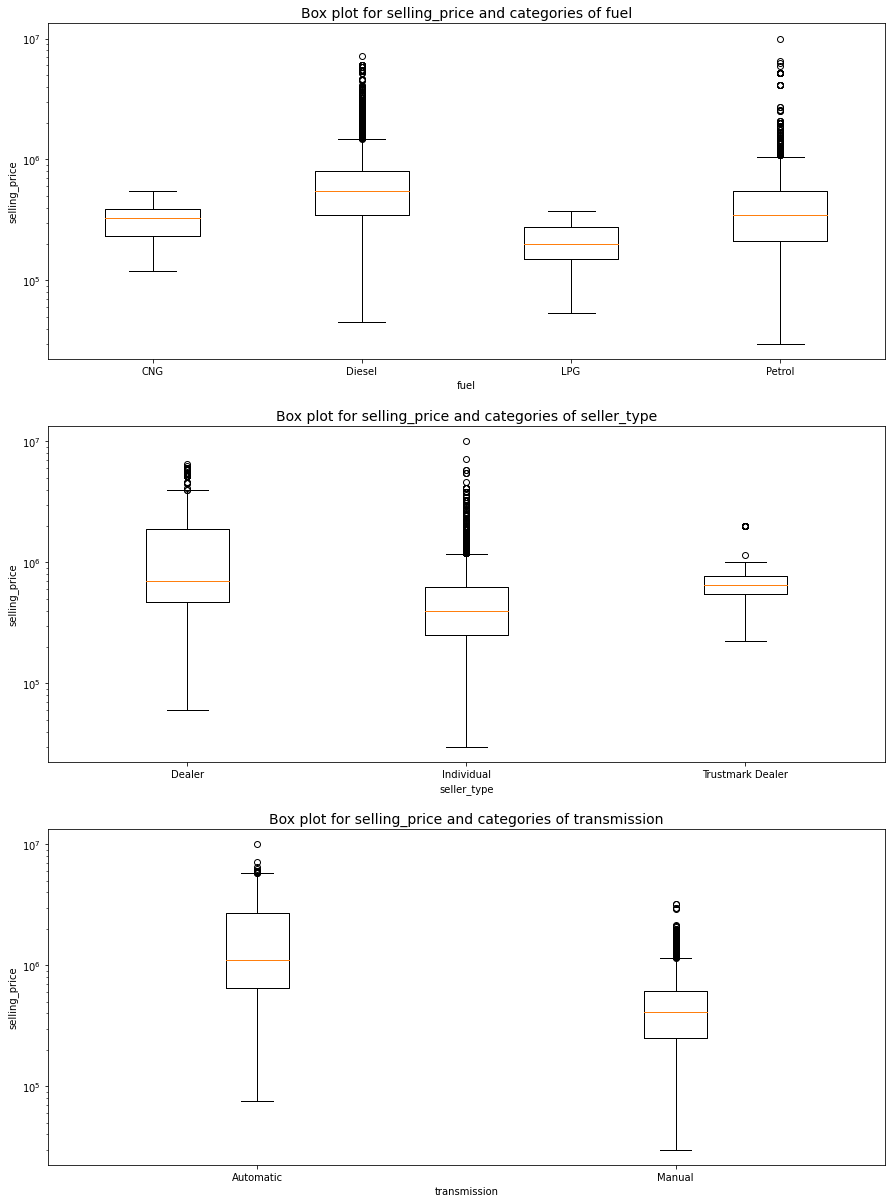

In [23]:
### Same bar plots with log scale for selling price(y-axis)

plt.figure(figsize=(15, 21))
discrete_features = ['fuel', 'seller_type', 'transmission']
for i, col in enumerate(discrete_features):
    plt.subplot(3, 1, i+1)
    plt.title(("Box plot for selling_price and categories of {}".format(col)), fontsize=14)
    items_in_col = {}
    for item in sorted(auto_mpg_df[col].unique()):
        item_val = auto_mpg_df.loc[auto_mpg_df[col] == item, 'selling_price'].values
        items_in_col.update({item: item_val})
    plt.boxplot(items_in_col.values())
    plt.xticks(range(1,len(items_in_col)+1), items_in_col.keys());
    plt.xlabel(col)
    plt.yscale("log")
    plt.ylabel('selling_price')

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

**Answer:** Linear regression is a good model for this problem as it can be observed that the most of the features exhibit a linear relationship with the labels and we are trying to predict a continuous-valued label(selling_price).

In [24]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [25]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [26]:
# 1. No categorical features in the synthetic dataset (skip this step)
ord_enc_features = ['owner']
numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
ohe_features = ['fuel', 'seller_type', 'transmission']

preprocess = make_column_transformer((MinMaxScaler(), numerical_features),
                                     (OneHotEncoder(), ohe_features),
                                     (OrdinalEncoder(categories=[['Test Drive Car',
                                                                  'First Owner',
                                                                  'Second Owner',
                                                                  'Third Owner',
                                                                  'Fourth & Above Owner']]), ord_enc_features))


# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets

auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X,
                                                                                    auto_mpg_y,
                                                                                    test_size=0.2,
                                                                                    random_state=42)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev,
                                                                                      auto_mpg_y_dev,
                                                                                      test_size=0.25,
                                                                                      random_state=42)



# 3. Standardize the columns in the feature matrices
#Fit and transform scalar on training data
auto_mpg_X_train = preprocess.fit_transform(auto_mpg_X_train)
#Transform val data and test data
auto_mpg_X_val = preprocess.transform(auto_mpg_X_val)
auto_mpg_X_test = preprocess.transform(auto_mpg_X_test)

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [27]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        term1 = np.dot(X.T, X) + self.alpha * np.eye(X.shape[1])
        term2 = np.dot(X.T, y)
        self.w = np.linalg.solve(term1, term2)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = np.dot(X, self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [28]:
### Your code here
model = LinearRegression(alpha=0)
model.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_y_pred_train = model.predict(auto_mpg_X_train)
auto_mpg_y_pred_val = model.predict(auto_mpg_X_val)
auto_mpg_y_pred_test = model.predict(auto_mpg_X_test)

#auto_mpg_y_train_mse = np.mean((auto_mpg_y_pred_train - auto_mpg_y_train) ** 2)
#print("Training data MSE:", auto_mpg_y_train_mse)

print("Training data MSE: ", mean_squared_error(auto_mpg_y_train, auto_mpg_y_pred_train))

print("Validation data MSE: ", mean_squared_error(auto_mpg_y_val, auto_mpg_y_pred_val))

print("Test data MSE: ", mean_squared_error(auto_mpg_y_test, auto_mpg_y_pred_test))

print("Predictions on test set: ", auto_mpg_y_pred_test[:5])
print("Actual labels: ", auto_mpg_y_test[:5].values)

Training data MSE:  213551036009.41888
Validation data MSE:  208902864150.7408
Test data MSE:  209643565390.8445
Predictions on test set:  [ 657336.1772277   421663.27466961   92825.45200222  405921.28748147
 1077309.64408264]
Actual labels:  [501000 440000 140000 476999 620000]


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [29]:
### Your code here
# TO-DO
auto_mpg_y_train_mean = auto_mpg_y_train.mean()

print("Baseline model training data MSE: " , mean_squared_error(auto_mpg_y_train, auto_mpg_y_train_mean * np.ones(auto_mpg_y_train.shape)))

print("Baseline model validation data MSE: " , mean_squared_error(auto_mpg_y_val, auto_mpg_y_train_mean * np.ones(auto_mpg_y_val.shape)))

print("Baseline model test data MSE: " , mean_squared_error(auto_mpg_y_test, auto_mpg_y_train_mean * np.ones(auto_mpg_y_test.shape)))

Baseline model training data MSE:  662695177733.76
Baseline model validation data MSE:  625775241109.3202
Baseline model test data MSE:  695299107097.1223


We can observe that the linear regression MSE values are much lower than the baseline MSE values.

**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

Text(0, 0.5, 'Weight')

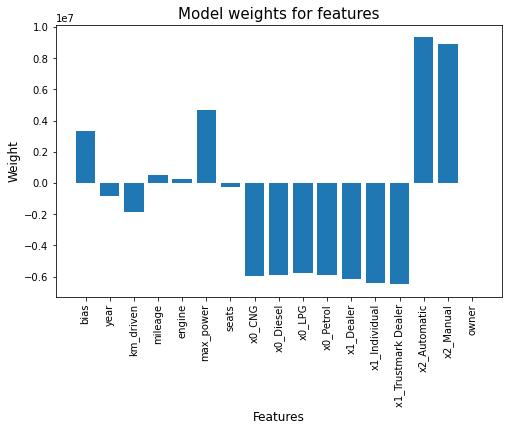

In [30]:
### Your code here
plt.figure(figsize=(8, 5))

ohe_list = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()
features_list = ['bias'] + numerical_features + ohe_list + ['owner']
w_list = model.w

plt.bar(range(len(w_list)), w_list)
plt.xticks(range(len(w_list)), features_list, fontsize=10, rotation = 90)
plt.title('Model weights for features', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Weight', fontsize=12)

**Answer:** The greatest contributors to the selling price are max_power and transmission, and fuel_type.
The max_power feature positively contribute to the selling price. Intutively this makes sense as well, as cars with more maximum power will have a higher selling price. 
Feature km_driven negatively affects the selling price as cars that have high number of kilometers driven will have a lower selling price.

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

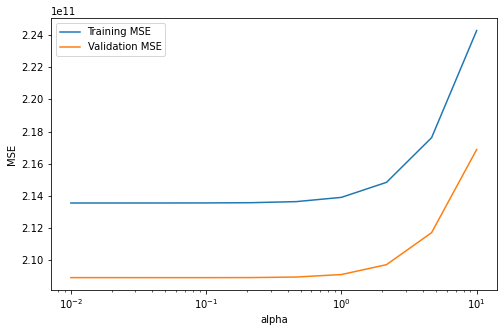

In [31]:
### Your code here
alphas = np.logspace(-2, 1, 10)

train_MSE_list = []
val_MSE_list = []

for alpha in alphas:
    model = LinearRegression(alpha)
    model.train(auto_mpg_X_train, auto_mpg_y_train)

    y_pred_train = model.predict(auto_mpg_X_train)
    y_train_mse = np.mean((y_pred_train - auto_mpg_y_train) ** 2)
    train_MSE_list.append(y_train_mse)

    y_pred_val = model.predict(auto_mpg_X_val)
    y_val_mse = np.mean((y_pred_val - auto_mpg_y_val) ** 2)
    val_MSE_list.append(y_val_mse)

plt.figure(figsize=(8, 5))
plt.plot(alphas, train_MSE_list, label='Training MSE')
plt.plot(alphas, val_MSE_list, label='Validation MSE')
plt.xscale("log")
plt.ylabel('MSE')
plt.xlabel('alpha')
plt.legend(loc='upper left')

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

**Answer:** As model complexity decreases further or alpha increases, both the training and validation MSE increase rapidly, after the optimum value of alpha has been crossed.
With increase in the alpha value, we penalize the weights of the features more causing the model underfit the data. Hence, the training and validation MSE increase.


**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [32]:
### Your code here

val_MSEs = np.array(val_MSE_list)
best_alpha = alphas[np.argmin(val_MSE_list)]
print("Best alpha:", best_alpha)

model = LinearRegression(alpha=best_alpha)
model.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_y_pred_train = model.predict(auto_mpg_X_train)
auto_mpg_y_pred_val = model.predict(auto_mpg_X_val)
auto_mpg_y_pred_test = model.predict(auto_mpg_X_test)

print("Training data MSE: ", mean_squared_error(auto_mpg_y_train, auto_mpg_y_pred_train))

print("Validation data MSE: ", mean_squared_error(auto_mpg_y_val, auto_mpg_y_pred_val))

print("Test data MSE: ", mean_squared_error(auto_mpg_y_test, auto_mpg_y_pred_test))

Best alpha: 0.1
Training data MSE:  213555449895.60843
Validation data MSE:  208901034786.84995
Test data MSE:  209533029608.978


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [33]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [34]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [35]:
#code here
voice_X = voice_df.drop(columns=['label'])
voice_y = voice_df['label']
voice_y.value_counts(normalize=True)

male      0.5
female    0.5
Name: label, dtype: float64

Hence the probability of observing the differenet categories(male and female) is equal.

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

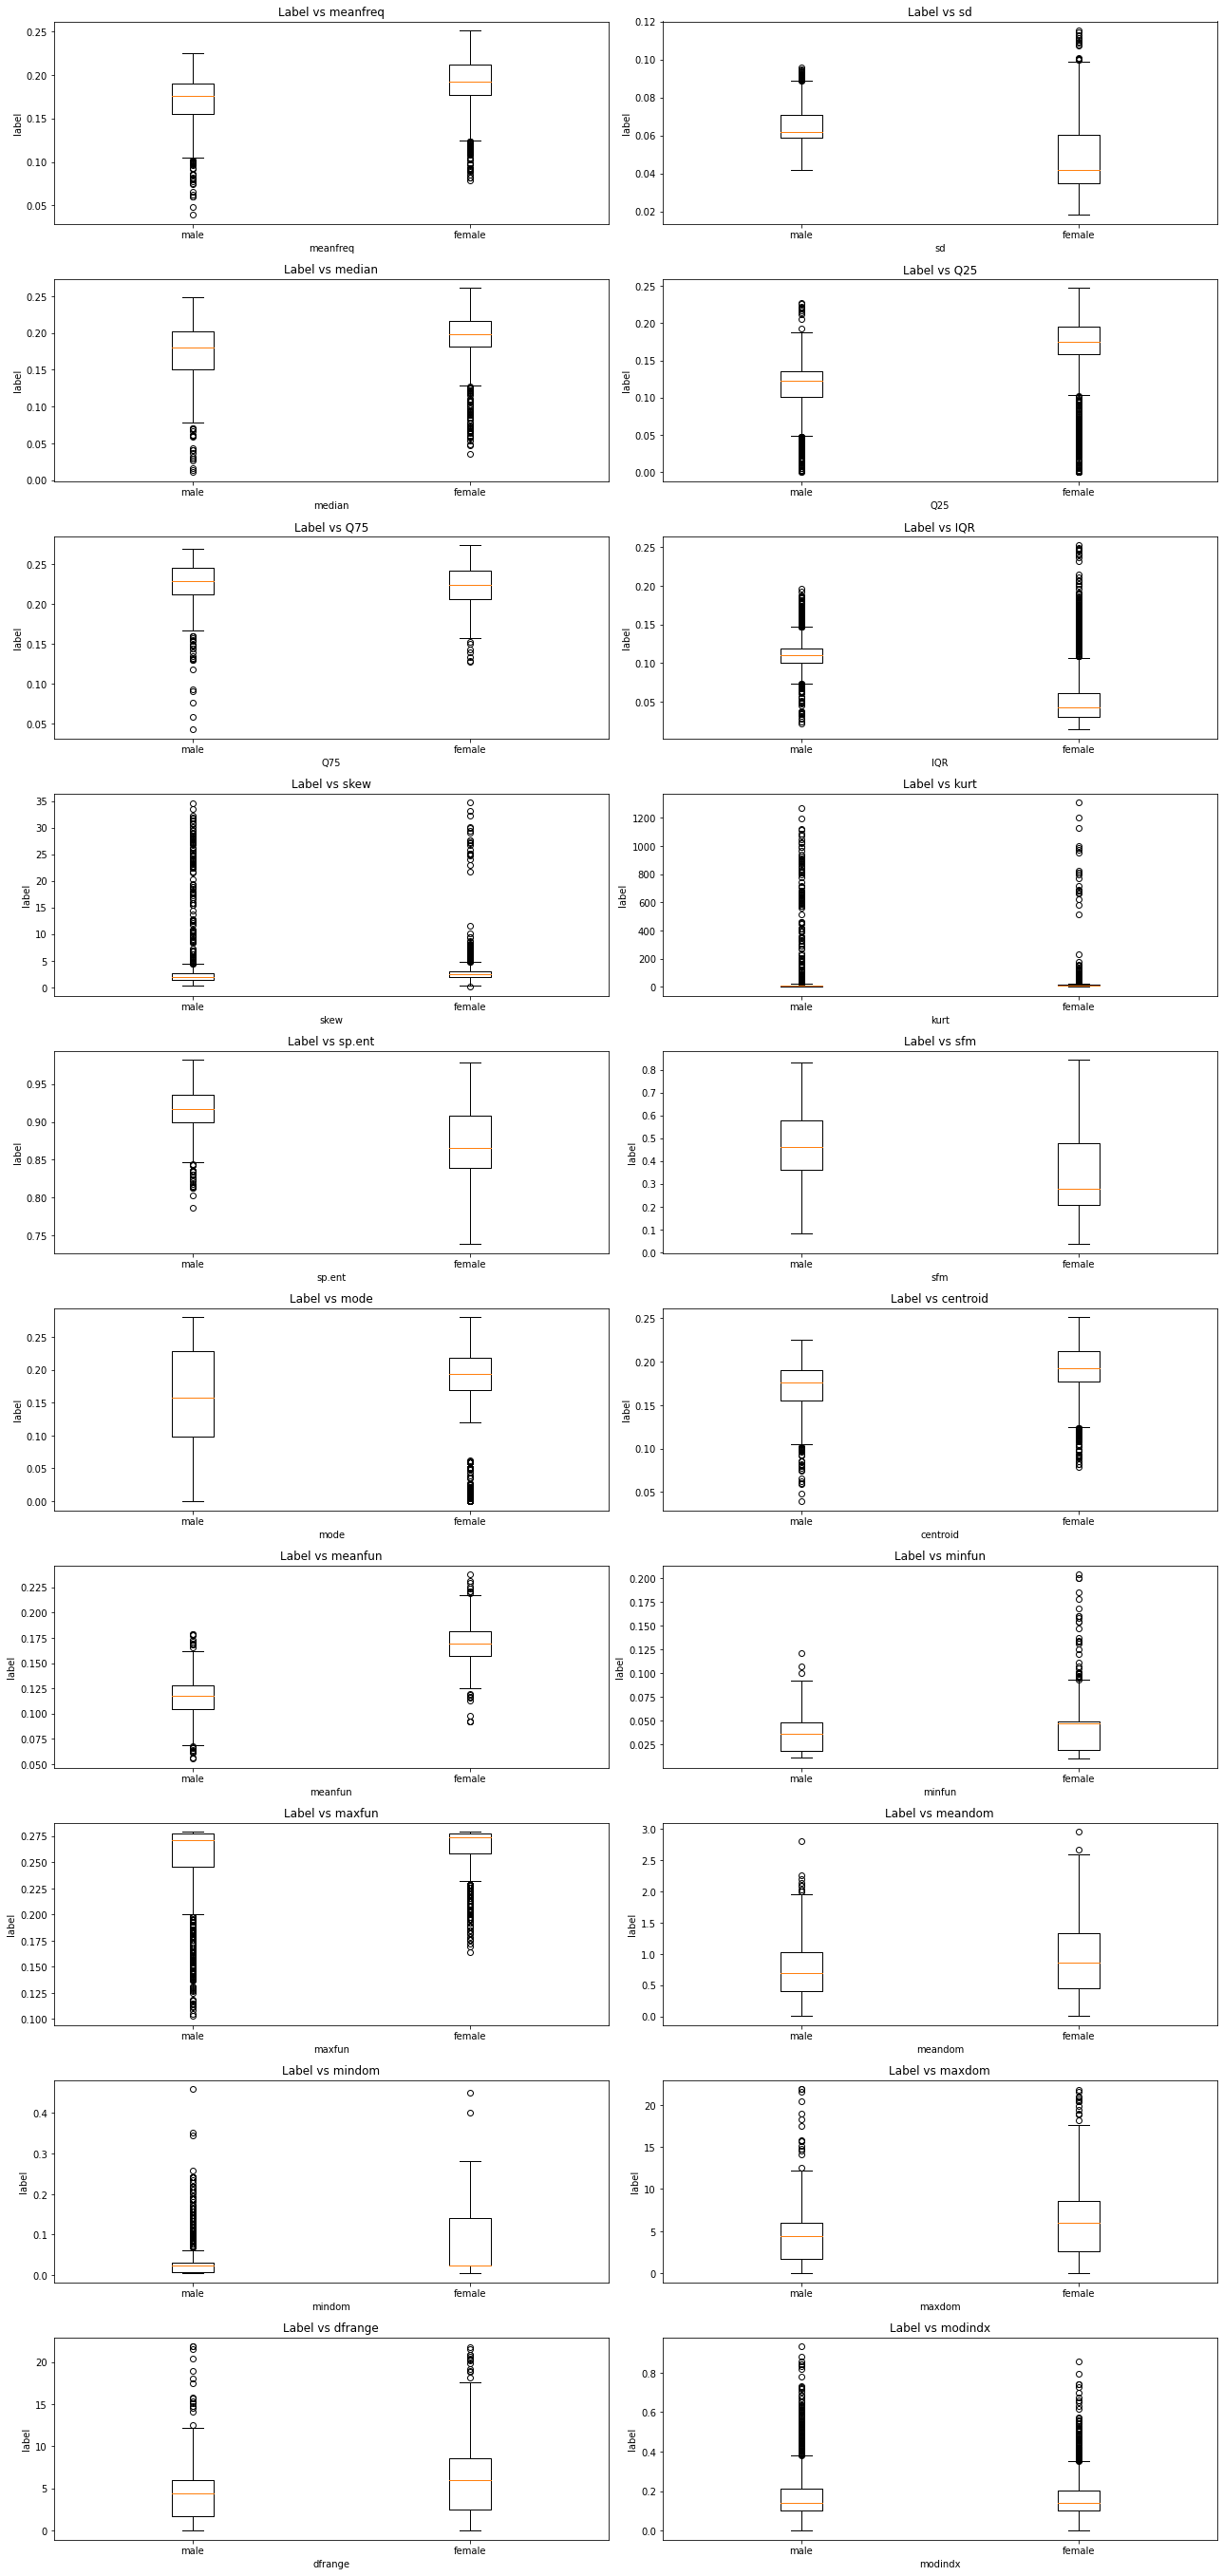

In [36]:
#code here
plt.figure(figsize=(18, 75))
for i, col in enumerate(voice_X.columns):
    plt.subplot(20, 2, i+1)
    plt.title(("Label vs {}".format(col)), fontsize=12)
    items_in_col = {}
    #for item in sorted(voice_y[col].unique()):
    for item in ['male', 'female']:
        item_val = voice_X.loc[voice_y == item, col].values
        items_in_col.update({item: item_val})
    plt.boxplot(items_in_col.values())
    plt.xticks(range(1,len(items_in_col)+1), items_in_col.keys());
    plt.xlabel(col)
    plt.ylabel('label')
plt.tight_layout()

**Answer:** Boxplots helps us understand the statistical distribution of the data. They give us an graphical understanding spread and skewness groups of numerical data. And hence enable us to observe certain features that allow us to differentiate between male and female.

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

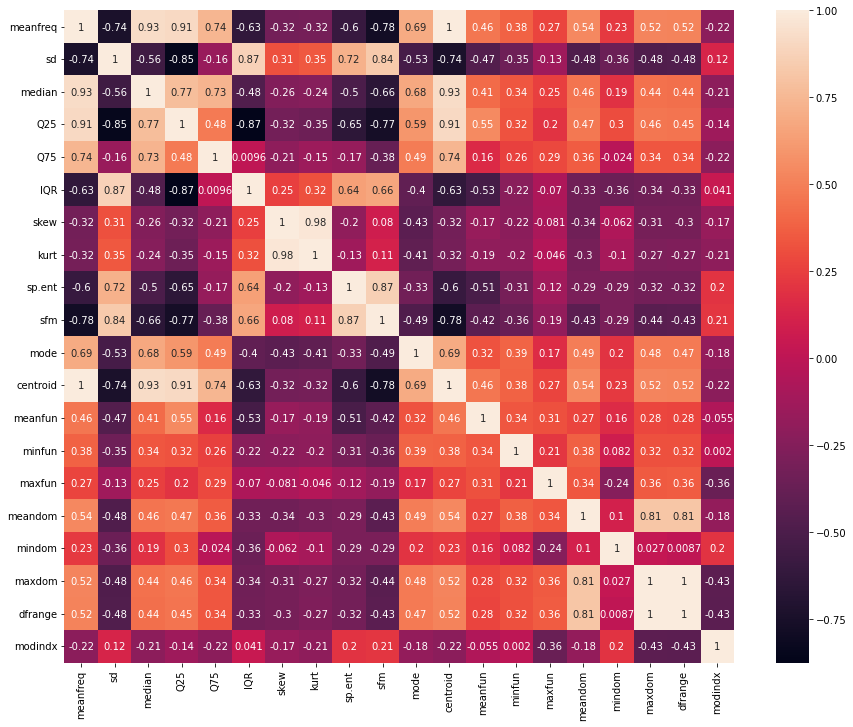

In [37]:
#code here
corrMatrix = voice_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [38]:
cor_matrix = corrMatrix.abs()

triangle1 = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [col for col in triangle1.columns if any(triangle1[col] > 0.9)]

print("Columns to be dropped: ", to_drop)

voice_df1 = voice_df.drop(to_drop, axis=1)

Columns to be dropped:  ['median', 'Q25', 'kurt', 'centroid', 'dfrange']


**Answer:** It is necessary to drop these highly correlated features as they will otherwise affect our logistic regression model as it can lead to numerical instability.

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [39]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df1['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [40]:
#code here
#code here

# 1. Encode categorical label: male --> 0, female --> 1
enc = OrdinalEncoder(categories=[['male', 'female']])
voice_y = enc.fit_transform(voice_y.to_numpy().reshape(-1, 1))

# 2. Convert label to Numpy vector
voice_y = voice_y.reshape((voice_y.shape[0], 1))

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
voice_X_dev, voice_X_test, voice_y_dev, voice_y_test = train_test_split(voice_X,
                                                                        voice_y,
                                                                        test_size=0.2,
                                                                        random_state=42)
voice_X_train, voice_X_val, voice_y_train, voice_y_val = train_test_split(voice_X_dev,
                                                                          voice_y_dev,
                                                                          test_size=0.25,
                                                                          random_state=42)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
voice_X_train = scaler.fit_transform(voice_X_train)
voice_X_val = scaler.transform(voice_X_val)
voice_X_test = scaler.transform(voice_X_test)

# 5. Add a column of ones to the feature matrices
voice_X_train = np.hstack([np.ones((voice_X_train.shape[0], 1)), voice_X_train])
voice_X_val = np.hstack([np.ones((voice_X_val.shape[0], 1)), voice_X_val])
voice_X_test = np.hstack([np.ones((voice_X_test.shape[0], 1)), voice_X_test])

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [41]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        losses = []
        
        # Initialise weight
        self.w = np.zeros((X.shape[1], 1))
        
        # Epochs
        for i in range(self.t):
            loss = self.calculate_loss(X, y)
            losses.append(loss)
            self.w -= self.eta * self.calculate_gradient(X, y)
        return losses
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        y_pred_prob = self.calculate_sigmoid(np.dot(X, self.w))
        y_pred = (y_pred_prob > 0.5).astype(int)
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        loss = (- np.dot(y.T, np.log(self.calculate_sigmoid(np.dot(X, self.w))))
                - np.dot((1 - y).T, np.log(1 - self.calculate_sigmoid(np.dot(X, self.w))))
                + self.alpha * (np.dot(self.w.T, self.w)))
        return loss[0]
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        gradient = (np.dot(X.T, (self.calculate_sigmoid(X @ self.w) - y)) + 
                    2 * self.alpha * self.w)
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        sigmoid = 1 / (1 + np.exp(-x))
        return sigmoid

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

Text(0.5, 0, 'Epochs')

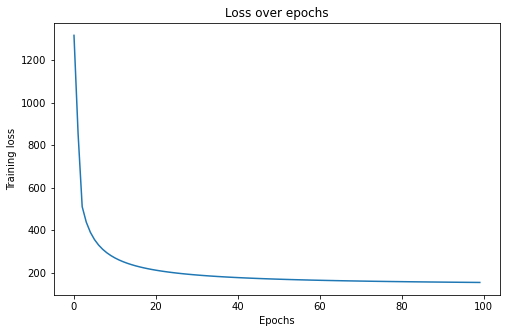

In [42]:
#code here
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = model.train(voice_X_train, voice_y_train)

plt.figure(figsize=(8, 5))
plt.plot(range(len(losses)), losses)
plt.title('Loss over epochs')
plt.ylabel('Training loss')
plt.xlabel('Epochs')

In [43]:
# B: Using alpha between (0,1), eta between(0, 0.001) and t between (0, 100), 
# find the best hyperparameters for LogisticRegression. 
# You can randomly search the space 20 times to find the best hyperparameters.

alphas = np.random.uniform(0, 1, 20)
etas = np.random.uniform(0, 0.001, 20)
epochs = np.random.randint(1, 100, 20)

min_val_MSE = np.inf
train_MSEs = []
val_MSEs = []
for i in range(0, 20):
    alpha = alphas[i]
    eta = etas[i]
    epoch = epochs[i]
    upd_model = LogisticRegression(alpha=alpha, t=epoch, eta=eta)
    losses = upd_model.train(voice_X_train, voice_y_train)

    voice_y_pred_train = upd_model.predict(voice_X_train)
    voice_y_train_mse = np.mean((voice_y_pred_train - voice_y_train) ** 2)
    train_MSEs.append(voice_y_train_mse)

    voice_y_pred_val = upd_model.predict(voice_X_val)
    voice_y_val_mse = np.mean((voice_y_pred_val - voice_y_val) ** 2)
    val_MSEs.append(voice_y_val_mse)
    if voice_y_val_mse < min_val_MSE:
        best_alpha = alpha
        best_eta = eta
        best_epoch = epoch

print("Best Hyperparameters for Logistic Regression:")
print("Best alpha: ", best_alpha)
print("Best eta: ", best_eta)
print("Best epoch: ", best_epoch)

Best Hyperparameters for Logistic Regression:
Best alpha:  0.8919233550156721
Best eta:  0.0008663823259286292
Best epoch:  35


In [44]:
# Compare accuracy on the test dataset for both the scenarios

voice_y_pred_test = model.predict(voice_X_test)
voice_y_test_accuracy = np.mean((voice_y_pred_test == voice_y_test))
print("Initial Model Test Accuracy:", voice_y_test_accuracy)

voice_y_pred_test = upd_model.predict(voice_X_test)
voice_y_test_accuracy = np.mean((voice_y_pred_test == voice_y_test))
print("Tuned Hyperparameter Model Test Accuracy:", voice_y_test_accuracy)

Initial Model Test Accuracy: 0.9794952681388013
Tuned Hyperparameter Model Test Accuracy: 0.9794952681388013


**The accuracies are similar for the initial and tuned models are quite similar. The hyperparameter tuning search space is limited, i.e. we only had 20 iterations.**

**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

Text(0, 0.5, 'Weight')

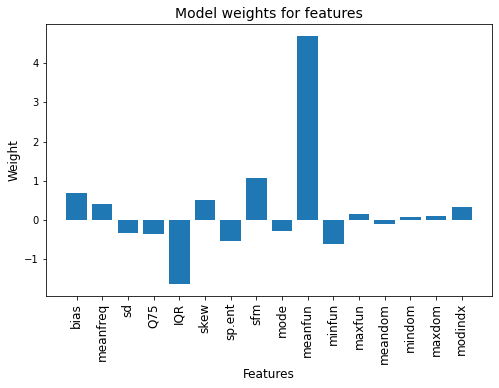

In [45]:
#code here
### code here
w_l = []
for item in model.w:
    w_l.append(item[0])
features_list = ['bias'] + voice_X.columns.tolist()

plt.figure(figsize=(8, 5))
plt.bar(range(len(w_l)), w_l)
plt.xticks(range(len(w_l)), features_list, fontsize=12)
plt.xticks(rotation = 90)
plt.title('Model weights for features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Weight', fontsize=12)


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [46]:
# Linear

#dual_linear.fit(voice_X_train, voice_y_train.flatten())

print('Dual SVM with default parameters and linear kernel')

linear_clf = SVC(kernel='linear')
linear_clf.fit(voice_X_train, voice_y_train.flatten())

print('Training data accuracy: {}'.format(linear_clf.score(voice_X_train, voice_y_train)))
print('Validation data accuracy: {}'.format(linear_clf.score(voice_X_val, voice_y_val)))
print('Test data accuracy: {}'.format(linear_clf.score(voice_X_test, voice_y_test)))

Dual SVM with default parameters and linear kernel
Training data accuracy: 0.9815789473684211
Validation data accuracy: 0.9621451104100947
Test data accuracy: 0.9763406940063092


In [47]:
# rbf
print('Dual SVM with default parameters and rbf kernel')

rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(voice_X_train, voice_y_train.flatten())

print('Training data accuracy: {}'.format(rbf_clf.score(voice_X_train, voice_y_train)))
print('Validation data accuracy: {}'.format(rbf_clf.score(voice_X_val, voice_y_val)))
print('Test data accuracy: {}'.format(rbf_clf.score(voice_X_test, voice_y_test)))

Dual SVM with default parameters and rbf kernel
Training data accuracy: 0.9868421052631579
Validation data accuracy: 0.9763406940063092
Test data accuracy: 0.9810725552050473


**Answer:** Here, rbf kernel gives us a better accuracy on the test dataset than the linear kernel as rbf kernel maps the input to a higher dimensional space, which enables the non-linear hyperplanes to be implemented in the actual dimensional space. The linear kernel is only able to create linear hyperplane in the actual space.

In [48]:
print("Support vectors for dual SVM with linear kernel:", linear_clf.support_vectors_.shape[0])
print("Support vectors for dual SVM with rbf kernel:", rbf_clf.support_vectors_.shape[0])

Support vectors for dual SVM with linear kernel: 139
Support vectors for dual SVM with rbf kernel: 274


**Answers:** Here, rbf kernel has more number of support vectors. It enables non-linear decision boundaries to a very large dimension, and hence it provides better accuracy as well. Here, the linear maps it to a much lower space than rbf hence the lower support vectors to split the data and hence lower accuracy.

**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [49]:
#code here
preprocess = StandardScaler()
dual_rbf = Pipeline(steps=[('preprocess', preprocess), ('dualSVM', SVC())]) 

kernel_grid = GridSearchCV(
    dual_rbf, 
    param_grid = {
        'dualSVM__kernel': ['rbf'],
        'dualSVM__C': np.linspace(1, 100, 50)
    },
    cv = 5)

kernel_grid.fit(voice_X_dev, voice_y_dev.flatten());
print('The best parameters are: {}'.format(kernel_grid.best_params_))
print('The best score: {}'.format(kernel_grid.best_score_))

The best parameters are: {'dualSVM__C': 9.081632653061224, 'dualSVM__kernel': 'rbf'}
The best score: 0.9818478065969704
